In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle

In [3]:
df_2020 = pd.read_csv('merged_gw2020.csv',low_memory = False)
df_2021 = pd.read_csv('merged_gw2021.csv',low_memory = False)


df_2020

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,1,32.0,1,0,0,0,55,True,0,1
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,0,0.0,1,0,0,0,50,True,0,1
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,...,1,0.0,0,0,0,0,50,True,0,1
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,0,0.0,1,0,0,0,50,True,0,1
4,Abdoulaye Doucouré,MID,Everton,1.3,0,0,20,1,44.6,512,...,0,4.0,3,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,Aaron Ramsdale,GK,Sheffield Utd,9.0,0,2,30,1,10.0,483,...,1,0.0,9,13618,17381,3763,46,True,0,38
24361,Adrien Silva,MID,Leicester,0.0,0,0,0,0,0.0,220,...,2,0.0,0,-16,0,16,44,True,0,38
24362,Sidnei Tavares,MID,Leicester,0.0,0,0,0,0,0.0,676,...,2,0.0,0,32,60,28,44,True,0,38
24363,Kalvin Phillips,MID,Leeds,6.5,0,0,17,0,12.8,204,...,3,8.0,6,210,789,579,49,True,1,38


In [4]:
season_2020 = pd.DataFrame({'season' : ['2019/20']*df_2020.shape[0]   })
season_2021 = pd.DataFrame({'season' : ['2020/21']*df_2021.shape[0]   })
season_2020

,season
0,2019/20
1,2019/20
2,2019/20
3,2019/20
4,2019/20
...,...
24360,2019/20
24361,2019/20
24362,2019/20
24363,2019/20


In [5]:
df_2020 =pd.concat([df_2020, season_2020] ,axis = 'columns')
df_2021 =pd.concat([df_2021, season_2021] ,axis = 'columns')

In [6]:
df= pd.concat([df_2020 , df_2021], axis = 'index',ignore_index = True)


In [7]:
df.drop(['xP'] , axis = 'columns',inplace = True)

In [8]:
#check for null value 

#df.isnull().values.any()

In [9]:
pd.set_option('display.max_columns',10)


df

,name,position,team,assists,bonus,...,value,was_home,yellow_cards,GW,season
0,Aaron Connolly,FWD,Brighton,0,0,...,55,True,0,1,2019/20
1,Aaron Cresswell,DEF,West Ham,0,0,...,50,True,0,1,2019/20
2,Aaron Mooy,MID,Brighton,0,0,...,50,True,0,1,2019/20
3,Aaron Ramsdale,GK,Sheffield Utd,0,0,...,50,True,0,1,2019/20
4,Abdoulaye Doucouré,MID,Everton,0,0,...,55,False,0,1,2019/20
...,...,...,...,...,...,...,...,...,...,...,...
29103,Wilfred Ndidi,MID,Leicester,0,0,...,49,True,0,8,2020/21
29104,Matt Ritchie,DEF,Newcastle,0,0,...,49,True,0,8,2020/21
29105,Nathan Redmond,MID,Southampton,1,3,...,59,True,0,8,2020/21
29106,Mathew Ryan,GK,Brighton,0,0,...,45,False,0,8,2020/21


In [10]:
#this cell was used in previous iteration remove only at the end 
#df['team_a_score']= df['team_a_score'].astype(float)
#df['team_h_score']= df['team_h_score'].astype(float)
df["was_home"] = df["was_home"].astype(int)

#used only when needed  z

In [11]:
selected_columns = df[["total_points"]]
new_df = selected_columns.copy()


In [12]:
new_df.rename(columns={'total_points': 'y'}, inplace = True)

In [13]:
df = pd.concat([df , new_df], axis = 'columns')

In [14]:
df

,name,position,team,assists,bonus,...,was_home,yellow_cards,GW,season,y
0,Aaron Connolly,FWD,Brighton,0,0,...,1,0,1,2019/20,1
1,Aaron Cresswell,DEF,West Ham,0,0,...,1,0,1,2019/20,1
2,Aaron Mooy,MID,Brighton,0,0,...,1,0,1,2019/20,0
3,Aaron Ramsdale,GK,Sheffield Utd,0,0,...,1,0,1,2019/20,1
4,Abdoulaye Doucouré,MID,Everton,0,0,...,0,0,1,2019/20,3
...,...,...,...,...,...,...,...,...,...,...,...
29103,Wilfred Ndidi,MID,Leicester,0,0,...,1,0,8,2020/21,0
29104,Matt Ritchie,DEF,Newcastle,0,0,...,1,0,8,2020/21,1
29105,Nathan Redmond,MID,Southampton,1,3,...,1,0,8,2020/21,9
29106,Mathew Ryan,GK,Brighton,0,0,...,0,0,8,2020/21,0


In [15]:
df.sort_values(by=['name','season','GW'], inplace =True)
df

,name,position,team,assists,bonus,...,was_home,yellow_cards,GW,season,y
0,Aaron Connolly,FWD,Brighton,0,0,...,1,0,1,2019/20,1
425,Aaron Connolly,FWD,Brighton,0,2,...,0,0,2,2019/20,8
964,Aaron Connolly,FWD,Brighton,0,0,...,1,0,3,2019/20,2
1518,Aaron Connolly,FWD,Brighton,0,0,...,0,0,4,2019/20,2
2080,Aaron Connolly,FWD,Brighton,1,0,...,0,0,5,2019/20,4
...,...,...,...,...,...,...,...,...,...,...,...
21631,Ørjan Nyland,GK,Aston Villa,0,0,...,1,0,35,2019/20,0
21632,Ørjan Nyland,GK,Aston Villa,0,0,...,1,0,35,2019/20,0
22530,Ørjan Nyland,GK,Aston Villa,0,0,...,0,0,36,2019/20,0
23145,Ørjan Nyland,GK,Aston Villa,0,0,...,0,0,37,2019/20,0


In [16]:
df.reset_index(inplace = True)
df.drop(['index'],axis= 'columns' , inplace =True)


In [17]:
df

,name,position,team,assists,bonus,...,was_home,yellow_cards,GW,season,y
0,Aaron Connolly,FWD,Brighton,0,0,...,1,0,1,2019/20,1
1,Aaron Connolly,FWD,Brighton,0,2,...,0,0,2,2019/20,8
2,Aaron Connolly,FWD,Brighton,0,0,...,1,0,3,2019/20,2
3,Aaron Connolly,FWD,Brighton,0,0,...,0,0,4,2019/20,2
4,Aaron Connolly,FWD,Brighton,1,0,...,0,0,5,2019/20,4
...,...,...,...,...,...,...,...,...,...,...,...
29103,Ørjan Nyland,GK,Aston Villa,0,0,...,1,0,35,2019/20,0
29104,Ørjan Nyland,GK,Aston Villa,0,0,...,1,0,35,2019/20,0
29105,Ørjan Nyland,GK,Aston Villa,0,0,...,0,0,36,2019/20,0
29106,Ørjan Nyland,GK,Aston Villa,0,0,...,0,0,37,2019/20,0


In [18]:
df.to_csv('aavash.csv')

In [19]:
1

1

In [20]:
for x in range(df.shape[0]):
    if x == (df.shape[0]-1):
        #df=df.drop(labels=[x], axis=0)
        break
    if df.loc[x,'name'] == df.loc[x+1 , 'name']:
        df.loc[x+1 ,'total_points'] = df.loc[x , 'y']
    #else:
        #df=df.drop(labels=[x], axis=0)
    
    

In [21]:
df.loc[: ,['total_points','y']]

,total_points,y
0,1,1
1,1,8
2,8,2
3,2,2
4,2,4
...,...,...
29103,0,0
29104,0,0
29105,0,0
29106,0,0


In [22]:
df.to_csv('check.csv')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29108 entries, 0 to 29107
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               29108 non-null  object 
 1   position           29108 non-null  object 
 2   team               29108 non-null  object 
 3   assists            29108 non-null  int64  
 4   bonus              29108 non-null  int64  
 5   bps                29108 non-null  int64  
 6   clean_sheets       29108 non-null  int64  
 7   creativity         29108 non-null  float64
 8   element            29108 non-null  int64  
 9   fixture            29108 non-null  int64  
 10  goals_conceded     29108 non-null  int64  
 11  goals_scored       29108 non-null  int64  
 12  ict_index          29108 non-null  float64
 13  influence          29108 non-null  float64
 14  kickoff_time       29108 non-null  object 
 15  minutes            29108 non-null  int64  
 16  opponent_team      291

In [24]:
#converting string into numerical data so that it can me used for regression 
#one hot encoding is used 

In [25]:
season = pd.get_dummies(df.season)
player = pd.get_dummies(df.name)
position = pd.get_dummies(df.position)
team = pd.get_dummies(df.team)
#oposition = pd.get_dummies(df.opponent_team)


In [26]:
#concatinating numerical data into the data frame 

In [27]:
merged = pd.concat([ season,
player,
position, 
team] ,axis = 'columns')




In [28]:
df.drop(['season' , 'name' ,'position' ,'team' ,'kickoff_time','total_points'],axis ='columns', inplace = True)


In [29]:
x= df

In [30]:

df

,assists,bonus,bps,clean_sheets,creativity,...,value,was_home,yellow_cards,GW,y
0,0,0,-3,0,0.3,...,55,1,0,1,1
1,0,2,27,1,11.3,...,55,0,0,2,8
2,0,0,2,0,12.1,...,55,1,0,3,2
3,0,0,7,0,0.3,...,55,0,0,4,2
4,1,0,13,0,10.3,...,55,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...
29103,0,0,0,0,0.0,...,40,1,0,35,0
29104,0,0,0,0,0.0,...,40,1,0,35,0
29105,0,0,0,0,0.0,...,40,0,0,36,0
29106,0,0,0,0,0.0,...,40,0,0,37,0


In [31]:
#preparing Y for training 

#y = df.loc[:, {'y'}]

#y_test = df.loc[slicer, {'y'}]

#y_train.shape
#y

In [32]:
#x=df.drop(['y'],axis ='columns') 
#x_train=X.loc[0:slicer_x] 
#x_test=X.loc[slicer_x:]
#merged_train = merged.loc[0:slicer_x] 
#merged_test = merged.loc[slicer_x:]

In [33]:
#x

In [34]:
#merged_train


In [35]:
scaler = StandardScaler().fit(df)
#scaler_train = StandardScaler().fit(x_train)
#x_test_scaled =scaler_test.transform(x_test)
df_scaled =scaler.transform(df)


In [36]:
df_scaled= pd.DataFrame(df_scaled, columns = list(x.columns))
#x_train_scaled = pd.DataFrame(x_train_scaled , columns = list(x_train.columns))
df_scaled

,assists,bonus,bps,clean_sheets,creativity,...,value,was_home,yellow_cards,GW,y
0,-0.181151,-0.213843,-0.913768,-0.341431,-0.402315,...,0.287345,1.000687,-0.222495,-1.469154,-0.123919
1,-0.181151,3.986244,2.236479,2.928848,0.656906,...,0.287345,-0.999313,-0.222495,-1.382334,2.701321
2,-0.181151,-0.213843,-0.388727,-0.341431,0.733941,...,0.287345,1.000687,-0.222495,-1.295514,0.279687
3,-0.181151,-0.213843,0.136314,-0.341431,-0.402315,...,0.287345,-0.999313,-0.222495,-1.208694,0.279687
4,4.651977,-0.213843,0.766364,-0.341431,0.560614,...,0.287345,-0.999313,-0.222495,-1.121874,1.086898
...,...,...,...,...,...,...,...,...,...,...,...
29103,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,-0.943022,1.000687,-0.222495,1.482726,-0.527524
29104,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,-0.943022,1.000687,-0.222495,1.482726,-0.527524
29105,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,-0.943022,-0.999313,-0.222495,1.569546,-0.527524
29106,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,-0.943022,-0.999313,-0.222495,1.656366,-0.527524


In [37]:
#x_test_scaled.info()


In [38]:
#y_train.shape
#merged_test.info()

In [39]:
#esma train ko index mileko le garda train scaled concatinate garda mileko cha tara test ko index na mileko
#test sclaed concat garda milena 
df = pd.concat([df_scaled , merged] ,axis = 'columns')
#x_train_scaled = pd.concat([x_train_scaled , merged_train] ,axis = 'columns')


In [40]:
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [41]:
total_row= df.shape[0]
slicer = int(total_row*0.8)

In [42]:
X=df.drop(['y'],axis ='columns') 
x_train=X.loc[0:slicer] 
x_test=X.loc[slicer:]

#merged_train = merged.loc[0:slicer_x] 
#merged_test = merged.loc[slicer_x:]

In [43]:
y_train = df.loc[0:slicer, {'y'}]

y_test = df.loc[slicer:, {'y'}]


In [44]:
y_train

,y
0,-0.527524
1,4.315743
2,0.279687
3,-0.527524
4,-0.527524
...,...
23282,0.279687
23283,-0.527524
23284,-0.123919
23285,0.279687


In [45]:
df

,assists,bonus,bps,clean_sheets,creativity,...,Spurs,Watford,West Brom,West Ham,Wolves
0,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,0,0,0,0,0
1,4.651977,3.986244,3.496577,-0.341431,3.699759,...,0,0,0,0,0
2,-0.181151,-0.213843,-0.703751,-0.341431,1.215405,...,0,0,0,0,0
3,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,0,0,0,0,0
4,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29103,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,0,0,0,0,0
29104,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,0,0,1,0,0
29105,-0.181151,-0.213843,-0.598743,-0.341431,-0.431202,...,0,0,0,0,0
29106,-0.181151,-0.213843,0.241323,-0.341431,-0.344539,...,0,0,0,0,0


In [46]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [47]:
#y_train

In [48]:

y_train.shape

(23287, 1)

In [49]:
x_train.shape

(23287, 952)

In [50]:
ones = np.ones((x_train.shape[0],1))
ones.shape


(23287, 1)

In [51]:
x_train = np.concatenate((ones, x_train), axis=1)
theta = np.ones((x_train.shape[1],1))
theta.shape



(953, 1)

In [52]:
x_train.shape

(23287, 953)

In [53]:
ones=ones = np.ones((x_test.shape[0],1))

In [54]:
x_test = np.concatenate((ones, x_test), axis=1)

In [55]:
x_test.shape

(5822, 953)

In [56]:
alpha = 0.01
itrs = 100

In [57]:
def costfunction(X , Y , theta):
    X.shape[0]
    temp = np.square(np.matmul(X,theta)) - Y
    cost = (1/(2*X.shape[0])*np.sum(temp))
    return cost 

In [58]:
theta.shape

(953, 1)

In [59]:
plot_j_theta_train =[]
plot_j_theta_test =[]
itr = []

In [60]:
transpose = np.transpose(x_train)
m = X.shape[0]

In [61]:
for i in range(itrs):
    theta = theta - (alpha/m) *np.matmul(transpose ,(np.matmul(x_train,theta) - y_train ))     
    J_theta_train = costfunction(x_train ,y_train , theta)
    J_theta_test = costfunction(x_test,y_test,theta)
    
    
    
    plot_j_theta_train.append(J_theta_train)
    plot_j_theta_test.append(J_theta_test)
    itr.append(i)
    
    
   
    

Text(0, 0.5, 'costfxn')

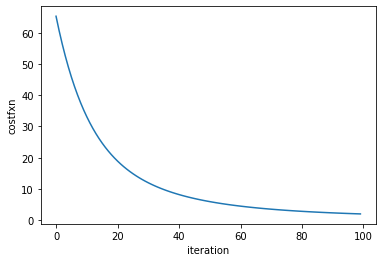

In [62]:
plt.plot(itr ,plot_j_theta_train)
plt.xlabel("iteration")
plt.ylabel("costfxn")

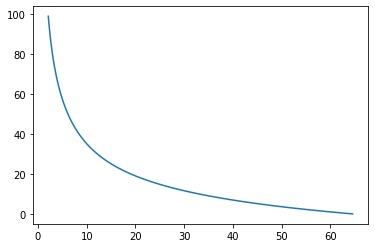

In [63]:
plt.plot(plot_j_theta_test , itr)